In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

pd.set_option("display.max_columns", None)


#É preciso indicar que o arquivo está usando "," como separador da parte decimal dos números float
df = pd.read_csv('socioeco_usp_ingres_2017 - alter.csv', sep=';', encoding='latin-1', decimal=',')



df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 53 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Código do Curso de Graduação         50 non-null     object 
 1   Nome do Curso de Graduação           50 non-null     object 
 2   Código do Município do Curso         50 non-null     int64  
 3   Município                            50 non-null     object 
 4   Carreira USP                         50 non-null     int64  
 5   Curso USP                            50 non-null     int64  
 6   P1  Sexo Feminino                   50 non-null     float64
 7   P3  Cor/Raça não Branco             50 non-null     float64
 8   P5  Onde EF Td Pub                  50 non-null     float64
 9   P6  Onde EM Td Pub                  50 non-null     float64
 10  P11  Renda Bruta <1                 50 non-null     float64
 11  P11  Renda Bruta 1 e 2           

In [2]:
df

,Código do Curso de Graduação,Nome do Curso de Graduação,Código do Município do Curso,Município,Carreira USP,Curso USP,P1  Sexo Feminino,P3  Cor/Raça não Branco,P5  Onde EF Td Pub,P6  Onde EM Td Pub,P11  Renda Bruta <1,P11  Renda Bruta 1 e 2,P11  Renda Bruta 2 e 3,P11  Renda Bruta 3 e 5,P11  Renda Bruta 5 e 7,P11  Renda Bruta 7 e 10,P11  Renda Bruta 10 e 15,P11  Renda Bruta 15 e 20,P11  Renda Bruta >20,P15  Instrução Mãe NE,P15  Instrução Mãe EFI,P15  Instrução Mãe EFC,P15  Instrução Mãe EMI,P15  Instrução Mãe EMC,P15  Instrução Mãe ESI,P15  Instrução Mãe ESC,P15  Instrução Mãe PGI,P15  Instrução Mãe PGC,P23  Computadores N,P23  Computadores 1,P23  Computadores 2,P23  Computadores 3,P23  Computadores 4,P28  PASUSP SIM,P29  INCLUSP SIM,P30  INCLUSP?EB SIM,P31  INCLUSP?PPI SIM,P32  Idade 16,P32  Idade 17,P32  Idade 18,P32  Idade 19,P32  Idade 20,P32  Idade 21,P32  Idade 22 a 25,P32  Idade >25,Taxa de Permanência - TAP,Taxa de Conclusão Acumulada - TCA,Taxa de Desistência Acumulada - TDA,TADA  2017,TADA  2018,TADA  2019,TADA  2020,TADA  2021
0,1292746,ADMINISTRAÇÃO,3538709,Piracicaba,101,12,42.9,8.6,14.3,17.1,0.0,2.9,5.7,25.7,17.1,14.3,14.3,11.4,8.6,0.0,0.0,0.0,2.9,17.1,5.7,48.6,2.9,22.9,2.9,34.3,40.0,14.3,8.6,2.9,17.1,11.4,2.9,0.0,22.9,28.6,28.6,11.4,2.9,5.7,0.0,13.2,55.3,31.6,0.0,15.8,7.9,5.3,2.6
1,2880,ARQUITETURA E URBANISMO,3550308,São Paulo,105,13,64.2,18.9,7.5,12.3,0.9,3.8,6.6,9.4,17.9,16.0,14.2,8.5,22.6,0.0,4.7,1.9,0.9,10.4,2.8,48.1,3.8,27.4,0.0,19.8,36.8,27.4,16.0,0.9,12.3,6.6,1.9,0.9,26.4,26.4,29.2,5.7,4.7,2.8,3.8,85.6,2.6,11.8,0.0,2.0,3.9,2.6,3.3
2,2886,ARQUITETURA E URBANISMO,3548906,São Carlos,110,14,67.7,19.3,9.7,9.7,0.0,3.2,9.7,12.9,9.7,22.6,22.6,3.2,16.1,0.0,3.2,0.0,0.0,16.1,9.7,32.3,3.2,35.5,0.0,16.1,32.3,22.6,29.0,0.0,9.7,3.2,3.2,3.2,16.1,22.6,32.3,16.1,6.5,3.2,0.0,74.5,15.7,9.8,0.0,0.0,0.0,2.0,7.8
3,2913/1404436,ARTES CÊNICAS,3550308,São Paulo,115,15,60.0,26.7,23.3,40.0,0.0,6.7,10.0,23.3,10.0,3.3,20.0,10.0,16.7,0.0,3.3,0.0,3.3,16.7,13.3,30.0,0.0,33.3,3.3,30.0,50.0,0.0,16.7,6.7,40.0,23.3,13.3,0.0,26.7,33.3,23.3,3.3,6.7,3.3,3.3,67.9,25.0,7.1,0.0,0.0,0.0,7.1,3.6
4,33343/45510,ARTES VISUAIS,3550308,São Paulo,125,17,83.3,30.0,23.3,33.3,0.0,3.3,16.7,13.3,10.0,16.7,20.0,3.3,16.7,0.0,13.3,3.3,0.0,6.7,6.7,43.3,0.0,26.7,0.0,30.0,36.7,20.0,13.3,6.7,33.3,20.0,3.3,0.0,13.3,26.7,6.7,13.3,6.7,13.3,20.0,48.6,24.3,27.1,0.0,0.0,0.0,10.0,17.1
5,60178,BIBLIOTECONOMIA E CIÊNCIA DA INFORMAÇÃO,3543402,Ribeirão Preto,140,21,53.8,15.4,69.2,76.9,0.0,7.7,38.5,23.1,15.4,0.0,7.7,0.0,7.7,0.0,15.4,15.4,7.7,46.2,0.0,7.7,0.0,7.7,7.7,53.8,30.8,0.0,7.7,0.0,76.9,69.2,15.4,0.0,7.7,7.7,15.4,7.7,7.7,23.1,30.8,40.6,18.8,40.6,0.0,18.8,18.8,0.0,3.1
6,47317,SUPERIOR DO AUDIOVISUAL,3550308,São Paulo,150,24,45.7,25.8,17.1,34.3,0.0,5.7,11.4,5.7,8.6,11.4,25.7,11.4,20.0,0.0,0.0,0.0,0.0,22.9,5.7,37.1,5.7,28.6,0.0,25.7,37.1,20.0,17.1,0.0,31.4,11.4,5.7,0.0,8.6,22.9,20.0,11.4,14.3,17.1,5.7,52.9,44.1,2.9,0.0,0.0,0.0,0.0,2.9
7,91591,DESIGN,3550308,São Paulo,155,25,60.7,28.6,25.0,32.1,0.0,0.0,14.3,25.0,14.3,17.9,3.6,14.3,10.7,0.0,0.0,0.0,7.1,21.4,3.6,50.0,3.6,14.3,3.6,32.1,28.6,14.3,21.4,3.6,32.1,14.3,0.0,3.6,14.3,21.4,7.1,14.3,7.1,21.4,10.7,69.2,12.8,17.9,0.0,2.6,7.7,0.0,7.7
8,118426,DIREITO,3543402,Ribeirão Preto,160,28,35.8,9.9,8.6,11.1,2.5,1.2,8.6,4.9,19.8,13.6,14.8,11.1,23.5,0.0,2.5,1.2,2.5,14.8,7.4,45.7,0.0,25.9,1.2,29.6,30.9,22.2,16.0,3.7,11.1,8.6,1.2,0.0,34.6,35.8,19.8,2.5,0.0,1.2,6.2,22.7,72.2,5.2,0.0,2.1,0.0,2.1,1.0
9,2887,CIÊNCIAS CONTÁBEIS,3550308,São Paulo,165,34,26.0,27.4,21.9,27.4,2.7,6.8,11.0,13.7,15.1,12.3,13.7,11.0,13.7,0.0,9.6,4.1,5.5,16.4,5.5,52.1,0.0,6.8,2.7,38.4,26.0,17.8,15.1,1.4,27.4,21.9,9.6,0.0,5.5,21.9,9.6,15.1,9.6,9.6,28.8,24.3,38.5,37.2,0.0,25.0,4.1,2.7,5.4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 53 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Código do Curso de Graduação         50 non-null     object 
 1   Nome do Curso de Graduação           50 non-null     object 
 2   Código do Município do Curso         50 non-null     int64  
 3   Município                            50 non-null     object 
 4   Carreira USP                         50 non-null     int64  
 5   Curso USP                            50 non-null     int64  
 6   P1  Sexo Feminino                   50 non-null     float64
 7   P3  Cor/Raça não Branco             50 non-null     float64
 8   P5  Onde EF Td Pub                  50 non-null     float64
 9   P6  Onde EM Td Pub                  50 non-null     float64
 10  P11  Renda Bruta <1                 50 non-null     float64
 11  P11  Renda Bruta 1 e 2           

In [4]:
#Vamos preprocessar algumas informações

In [4]:
print('Média: ', df['Taxa de Desistência Acumulada - TDA'].mean())
print('Médiana: ', df['Taxa de Desistência Acumulada - TDA'].median())
print('Desvio Padrão: ', df['Taxa de Desistência Acumulada - TDA'].std())

Média:  17.418000000000003
Médiana:  14.2
Desvio Padrão:  12.600156947516204


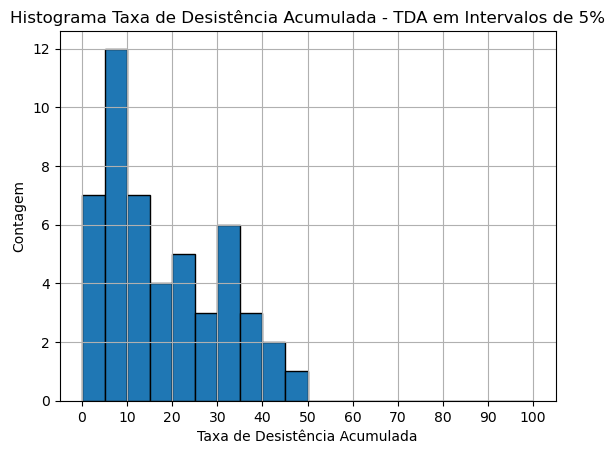

In [5]:
#Vamos verificar o histograma
# Defina os limites das bins em intervalos de 5%
bins = [i for i in range(0 , 101 , 5)]  # Isso cria uma lista de 0 a 100

# Crie o histograma usando o método hist do pandas
df['Taxa de Desistência Acumulada - TDA'].plot(kind='hist', bins=bins, edgecolor='k')

# Personalize o gráfico
plt.title('Histograma Taxa de Desistência Acumulada - TDA em Intervalos de 5%')
plt.xlabel('Taxa de Desistência Acumulada')
plt.ylabel('Contagem')
plt.xticks(range(0, 101, 10))  # Personalize os rótulos do eixo x
plt.grid(True)

# Exiba o gráfico
plt.show()

In [6]:
# Função para atribuir classe "Abaixo da Média" ou "Acima da Média" com base no TDA
def atribuir_classe(valor, limiar):
    if valor > limiar:
        return 'Acima da Média'
    else:
        return 'Abaixo da Média'


# Aplicar a função à coluna 'Taxa de Desistência Acumulada - TDA' e criar uma nova coluna 'Classe alvo'
media = df['Taxa de Desistência Acumulada - TDA'].mean()
limiar = media
df['Classe alvo'] = df['Taxa de Desistência Acumulada - TDA'].apply(atribuir_classe, args=(limiar,))
df

,Código do Curso de Graduação,Nome do Curso de Graduação,Código do Município do Curso,Município,Carreira USP,Curso USP,P1  Sexo Feminino,P3  Cor/Raça não Branco,P5  Onde EF Td Pub,P6  Onde EM Td Pub,P11  Renda Bruta <1,P11  Renda Bruta 1 e 2,P11  Renda Bruta 2 e 3,P11  Renda Bruta 3 e 5,P11  Renda Bruta 5 e 7,P11  Renda Bruta 7 e 10,P11  Renda Bruta 10 e 15,P11  Renda Bruta 15 e 20,P11  Renda Bruta >20,P15  Instrução Mãe NE,P15  Instrução Mãe EFI,P15  Instrução Mãe EFC,P15  Instrução Mãe EMI,P15  Instrução Mãe EMC,P15  Instrução Mãe ESI,P15  Instrução Mãe ESC,P15  Instrução Mãe PGI,P15  Instrução Mãe PGC,P23  Computadores N,P23  Computadores 1,P23  Computadores 2,P23  Computadores 3,P23  Computadores 4,P28  PASUSP SIM,P29  INCLUSP SIM,P30  INCLUSP?EB SIM,P31  INCLUSP?PPI SIM,P32  Idade 16,P32  Idade 17,P32  Idade 18,P32  Idade 19,P32  Idade 20,P32  Idade 21,P32  Idade 22 a 25,P32  Idade >25,Taxa de Permanência - TAP,Taxa de Conclusão Acumulada - TCA,Taxa de Desistência Acumulada - TDA,TADA  2017,TADA  2018,TADA  2019,TADA  2020,TADA  2021,Classe alvo
0,1292746,ADMINISTRAÇÃO,3538709,Piracicaba,101,12,42.9,8.6,14.3,17.1,0.0,2.9,5.7,25.7,17.1,14.3,14.3,11.4,8.6,0.0,0.0,0.0,2.9,17.1,5.7,48.6,2.9,22.9,2.9,34.3,40.0,14.3,8.6,2.9,17.1,11.4,2.9,0.0,22.9,28.6,28.6,11.4,2.9,5.7,0.0,13.2,55.3,31.6,0.0,15.8,7.9,5.3,2.6,Acima da Média
1,2880,ARQUITETURA E URBANISMO,3550308,São Paulo,105,13,64.2,18.9,7.5,12.3,0.9,3.8,6.6,9.4,17.9,16.0,14.2,8.5,22.6,0.0,4.7,1.9,0.9,10.4,2.8,48.1,3.8,27.4,0.0,19.8,36.8,27.4,16.0,0.9,12.3,6.6,1.9,0.9,26.4,26.4,29.2,5.7,4.7,2.8,3.8,85.6,2.6,11.8,0.0,2.0,3.9,2.6,3.3,Abaixo da Média
2,2886,ARQUITETURA E URBANISMO,3548906,São Carlos,110,14,67.7,19.3,9.7,9.7,0.0,3.2,9.7,12.9,9.7,22.6,22.6,3.2,16.1,0.0,3.2,0.0,0.0,16.1,9.7,32.3,3.2,35.5,0.0,16.1,32.3,22.6,29.0,0.0,9.7,3.2,3.2,3.2,16.1,22.6,32.3,16.1,6.5,3.2,0.0,74.5,15.7,9.8,0.0,0.0,0.0,2.0,7.8,Abaixo da Média
3,2913/1404436,ARTES CÊNICAS,3550308,São Paulo,115,15,60.0,26.7,23.3,40.0,0.0,6.7,10.0,23.3,10.0,3.3,20.0,10.0,16.7,0.0,3.3,0.0,3.3,16.7,13.3,30.0,0.0,33.3,3.3,30.0,50.0,0.0,16.7,6.7,40.0,23.3,13.3,0.0,26.7,33.3,23.3,3.3,6.7,3.3,3.3,67.9,25.0,7.1,0.0,0.0,0.0,7.1,3.6,Abaixo da Média
4,33343/45510,ARTES VISUAIS,3550308,São Paulo,125,17,83.3,30.0,23.3,33.3,0.0,3.3,16.7,13.3,10.0,16.7,20.0,3.3,16.7,0.0,13.3,3.3,0.0,6.7,6.7,43.3,0.0,26.7,0.0,30.0,36.7,20.0,13.3,6.7,33.3,20.0,3.3,0.0,13.3,26.7,6.7,13.3,6.7,13.3,20.0,48.6,24.3,27.1,0.0,0.0,0.0,10.0,17.1,Acima da Média
5,60178,BIBLIOTECONOMIA E CIÊNCIA DA INFORMAÇÃO,3543402,Ribeirão Preto,140,21,53.8,15.4,69.2,76.9,0.0,7.7,38.5,23.1,15.4,0.0,7.7,0.0,7.7,0.0,15.4,15.4,7.7,46.2,0.0,7.7,0.0,7.7,7.7,53.8,30.8,0.0,7.7,0.0,76.9,69.2,15.4,0.0,7.7,7.7,15.4,7.7,7.7,23.1,30.8,40.6,18.8,40.6,0.0,18.8,18.8,0.0,3.1,Acima da Média
6,47317,SUPERIOR DO AUDIOVISUAL,3550308,São Paulo,150,24,45.7,25.8,17.1,34.3,0.0,5.7,11.4,5.7,8.6,11.4,25.7,11.4,20.0,0.0,0.0,0.0,0.0,22.9,5.7,37.1,5.7,28.6,0.0,25.7,37.1,20.0,17.1,0.0,31.4,11.4,5.7,0.0,8.6,22.9,20.0,11.4,14.3,17.1,5.7,52.9,44.1,2.9,0.0,0.0,0.0,0.0,2.9,Abaixo da Média
7,91591,DESIGN,3550308,São Paulo,155,25,60.7,28.6,25.0,32.1,0.0,0.0,14.3,25.0,14.3,17.9,3.6,14.3,10.7,0.0,0.0,0.0,7.1,21.4,3.6,50.0,3.6,14.3,3.6,32.1,28.6,14.3,21.4,3.6,32.1,14.3,0.0,3.6,14.3,21.4,7.1,14.3,7.1,21.4,10.7,69.2,12.8,17.9,0.0,2.6,7.7,0.0,7.7,Acima da Média
8,118426,DIREITO,3543402,Ribeirão Preto,160,28,35.8,9.9,8.6,11.1,2.5,1.2,8.6,4.9,19.8,13.6,14.8,11.1,23.5,0.0,2.5,1.2,2.5,14.8,7.4,45.7,0.0,25.9,1.2,29.6,30.9,22.2,16.0,3.7,11.1,8.6,1.2,0.0,34.6,35.8,19.8,2.5,0.0,1.2,6.2,22.7,72.2,5.2,0.0,2.1,0.0,2.1,1.0,Abaixo da Média
9,2887,CIÊNCIAS CONTÁBEIS,3550308,São Paulo,165,34,26.0,27.4,21.9,27.4,2.7,6.8,11.0,13.7,15.1,12.3,13.7,11.0,13.7,0.0,9.6,4.1,5.5,16.4,5.5,52.1,0.0,6.8,2.7,38.4,26.0,17.8,15.1,1.4,27.4,21.9,9.6,0.0,5.5,21.9,9.6,15.1,9.6,9.6,28.8,24.3,38.5,37.2,0.0,25.0,4.1,2.7,5.4,Acima da Média


In [14]:
df['Município'].unique()

array(['Piracicaba', 'São Paulo', 'São Carlos', 'Ribeirão Preto', 'Bauru',
       'Pirassununga'], dtype=object)

In [8]:
# Selecionar colunas de recursos e alvo
X = df[['Município', 'P1  Sexo Feminino', 'P3  Cor/Raça não Branco',
       'P5  Onde EF Td Pub', 'P6  Onde EM Td Pub', 'P11  Renda Bruta <1',
       'P11  Renda Bruta 1 e 2', 'P11  Renda Bruta 2 e 3',
       'P11  Renda Bruta 3 e 5', 'P11  Renda Bruta 5 e 7',
       'P11  Renda Bruta 7 e 10', 'P11  Renda Bruta 10 e 15',
       'P11  Renda Bruta 15 e 20', 'P11  Renda Bruta >20',
       'P15  Instrução Mãe NE', 'P15  Instrução Mãe EFI',
       'P15  Instrução Mãe EFC', 'P15  Instrução Mãe EMI',
       'P15  Instrução Mãe EMC', 'P15  Instrução Mãe ESI',
       'P15  Instrução Mãe ESC', 'P15  Instrução Mãe PGI',
       'P15  Instrução Mãe PGC', 'P23  Computadores N',
       'P23  Computadores 1', 'P23  Computadores 2', 'P23  Computadores 3',
       'P23  Computadores 4', 'P28  PASUSP SIM', 'P29  INCLUSP SIM',
       'P30  INCLUSP?EB SIM', 'P31  INCLUSP?PPI SIM', 'P32  Idade 16',
       'P32  Idade 17', 'P32  Idade 18', 'P32  Idade 19', 'P32  Idade 20',
       'P32  Idade 21', 'P32  Idade 22 a 25', 'P32  Idade >25',
       ]]  # Variáveis preditoras
y = df['Classe alvo']  # Variável alvo

In [11]:
X['Município']

0     1
1     5
2     4
3     5
4     5
5     3
6     5
7     5
8     3
9     5
10    5
11    3
12    1
13    3
14    5
15    1
16    5
17    5
18    3
19    3
20    5
21    5
22    5
23    5
24    1
25    3
26    5
27    3
28    1
29    5
30    3
31    5
32    5
33    3
34    3
35    1
36    1
37    5
38    5
39    3
40    5
41    3
42    5
43    0
44    3
45    5
46    5
47    3
48    5
49    2
Name: Município, dtype: int32

In [10]:
# Codificar as colunas categóricas para números usando LabelEncoder
label_encoder = LabelEncoder()

for column in X.columns:
    if type(X[column][0]) == str:
        X[column] = label_encoder.fit_transform(X[column])


X['Município']

C:\Users\Marcos\AppData\Local\Temp\ipykernel_620\267217191.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoder.fit_transform(X[column])


0     1
1     5
2     4
3     5
4     5
5     3
6     5
7     5
8     3
9     5
10    5
11    3
12    1
13    3
14    5
15    1
16    5
17    5
18    3
19    3
20    5
21    5
22    5
23    5
24    1
25    3
26    5
27    3
28    1
29    5
30    3
31    5
32    5
33    3
34    3
35    1
36    1
37    5
38    5
39    3
40    5
41    3
42    5
43    0
44    3
45    5
46    5
47    3
48    5
49    2
Name: Município, dtype: int32

# Como são poucos dados, vamos utilizar o método Leave One Out

In [15]:
# Inicializar uma lista para armazenar os resultados de acurácia
accuracies = []

# Inicializar o objeto Leave One Out
loo = LeaveOneOut()

# Inicializar uma lista para armazenar as importâncias das características em cada iteração
feature_importances_list = []

# Iterar sobre os índices gerados pelo Leave One Out
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Criar um modelo de Árvore de Decisão
    model = DecisionTreeClassifier(random_state=42)
    
    # Treinar o modelo com os dados de treinamento
    model.fit(X_train, y_train)
    
    # Obter importâncias das características e armazenar
    feature_importances = model.feature_importances_
    feature_importances_list.append(feature_importances)
    
    # Fazer previsões nos dados de teste
    y_pred = model.predict(X_test)
    
    # Avaliar a precisão do modelo para esta iteração e armazenar
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Calcular a média das importâncias das características em todas as iterações
mean_feature_importances = np.mean(feature_importances_list, axis=0)

# Criar um DataFrame para visualização das importâncias
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': mean_feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Exibir as características mais importantes
print(importance_df)    
    
# Calcular a média das precisões em todas as iterações
mean_accuracy = sum(accuracies) / len(accuracies)

# Exibir a média da acurácia
print(f'Média da Acurácia LOO: {mean_accuracy:.2f}')

                      Feature  Importance
39            P32  Idade >25    0.318101
1          P1  Sexo Feminino    0.151586
31      P31  INCLUSP?PPI SIM    0.112439
0                   Município    0.103481
4         P6  Onde EM Td Pub    0.080406
35             P32  Idade 19    0.064763
34             P32  Idade 18    0.062644
33             P32  Idade 17    0.034275
19    P15  Instrução Mãe ESI    0.010851
20    P15  Instrução Mãe ESC    0.009869
17    P15  Instrução Mãe EMI    0.006580
9     P11  Renda Bruta 5 e 7    0.006327
6     P11  Renda Bruta 1 e 2    0.006325
7     P11  Renda Bruta 2 e 3    0.005115
30       P30  INCLUSP?EB SIM    0.004884
2    P3  Cor/Raça não Branco    0.004707
12  P11  Renda Bruta 15 e 20    0.004557
32             P32  Idade 16    0.003948
24       P23  Computadores 1    0.002200
36             P32  Idade 20    0.001856
38        P32  Idade 22 a 25    0.001530
21    P15  Instrução Mãe PGI    0.001366
25       P23  Computadores 2    0

In [16]:
feature_importances_list[0]

array([0.0376592 , 0.14436027, 0.        , 0.        , 0.1631839 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.04124579, 0.        , 0.        , 0.11784512,
       0.        , 0.        , 0.        , 0.        , 0.05499439,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.08502059, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.35569075])

In [17]:
accuracies

[0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0]